<a href="https://colab.research.google.com/github/adielws/covid19-questions/blob/master/covid19_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando *dataset* do Google Drive



In [34]:
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
import nltk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [1]:
from google.colab import drive
drive.mount('/content/drive/')
!ls '/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MIL.csv'

Mounted at /content/drive/
'/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MIL.csv'


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MIL.csv', error_bad_lines=False, delimiter=';', encoding="utf-8")
data.head(5)

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,23/03/2020 18:51,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,18/03/2020 03:18,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,29/03/2020 12:09,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,01/04/2020 21:11,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,19/03/2020 17:49,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-478778.0,-1577691.0,[]


# Visualizando informações básicas do *dataset*


In [3]:
data.shape

(50000, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        50000 non-null  object 
 1   usuario     49997 non-null  object 
 2   apelido     50000 non-null  object 
 3   texto       50000 non-null  object 
 4   retweet     50000 non-null  int64  
 5   seguidores  50000 non-null  int64  
 6   idioma      50000 non-null  object 
 7   lugar       2258 non-null   object 
 8   pais        2258 non-null   object 
 9   sigla       2258 non-null   object 
 10  latitude    275 non-null    float64
 11  longitude   275 non-null    float64
 12  hashtags    50000 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 5.0+ MB


In [5]:
data.idioma.unique() # categorias de idiomas

array(['pt', 'en', 'es', 'ar', 'tl', 'fr', 'und', 'nl', 'ja', 'cy', 'th',
       'fa', 'it', 'de', 'tr', 'eu', 'ca', 'ko', 'in', 'ht', 'lt', 'zh',
       'hi', 'lv', 'sv', 'is', 'pl', 'ur', 'sd', 'vi', 'no', 'te', 'cs',
       'ta', 'da', 'ru', 'hu', 'ro', 'et', 'uk', 'el', 'sr'], dtype=object)

In [6]:
data.pais.unique() # categorias de países

array([nan, 'Brazil', 'Ireland', 'Portugal', 'Spain', 'Germany', 'Canada',
       'United States', 'Angola', 'Uganda', 'The Netherlands', 'Japan',
       'United Kingdom', 'Republic of Mozambique', 'Belgium',
       'Kingdom of Saudi Arabia', 'Venezuela', 'Pakistan', 'Indonesia',
       'Chile', 'Senegal', 'Argentina', 'Colombia', 'France', 'Turkey',
       'Austria', 'Paraguay', 'Italy', 'New Zealand', 'Kenya',
       "People's Republic of China", 'Panama', 'Ghana', 'Ecuador',
       'Haiti', 'Australia', 'Mexico', 'Republic of the Philippines',
       'Republic of Croatia'], dtype=object)

In [7]:
data.sigla.unique() # categorias de siglas

array([nan, 'BR', 'IE', 'PT', 'ES', 'DE', 'CA', 'US', 'AO', 'UG', 'NL',
       'JP', 'GB', 'MZ', 'BE', 'SA', 'VE', 'PK', 'ID', 'CL', 'SN', 'AR',
       'CO', 'FR', 'TR', 'AT', 'PY', 'IT', 'NZ', 'KE', 'CN', 'PA', 'GH',
       'EC', 'HT', 'AU', 'MX', 'PH', 'HR'], dtype=object)

In [8]:
data.data.min() # data do tweet mais antigo

'01/01/2020 00:42'

In [9]:
data.data.max() # data do tweet mais recente

'31/05/2020 23:59'

In [10]:
data.hashtags.describe() # detalhes da coluna hashtags

count     50000
unique     2920
top          []
freq      45052
Name: hashtags, dtype: object

# Analisando a Frequência das Hashtags


Nesta seção, vamos visualizar a frequência das hashtags no nosso dataset. Para isso, vamos utilizar um gráfico conhecido como nuvem de palavras. Nós vamos implementar usando a biblioteca [Wordcloud](https://https://github.com/amueller/word_cloud).

In [11]:
!pip install wordcloud -q

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Nós vamos criar uma série a partir do atributo *hashtag* do dataframe. Nós vamos incluir nessa série apenas os valores não faltantes.

In [13]:
hashtags = data.dropna(subset=['hashtags'])['hashtags']
hashtags.describe()

count     50000
unique     2920
top          []
freq      45052
Name: hashtags, dtype: object

In [14]:
hashtags.unique() # visualizando valores únicos.

array(['[]', "['tvPT']", "['Venezuela']", ..., "['taekookau']",
       "['covid', 'coronavirus', 'novocoronavírus', 'prevenção', 'alcoolgel']",
       "['rezando', 'mestrejoel', 'covid19']"], dtype=object)

Podemos ver que cada item da série é um array de strings, cujos valores são as hashtags de uma linha do dataframe. Portanto, precisamos separar esses valores em strings individuais, para que possamos calcular sua frequência.

Mas antes vamos remover da série os itens cujo valor é um array vazio. Eles são os itens que têm o valor '[]'.

In [15]:
hashtags = hashtags[hashtags != '[]'] # removendo itens que não tem hashtags
hashtags.describe()

count            4948
unique           2919
top       ['COVID19']
freq              283
Name: hashtags, dtype: object

In [16]:
hashtags.unique() # visualizando valores únicos. Veja que não existe mais o valor '[]'.

array(["['tvPT']", "['Venezuela']", "['Covid_19']", ..., "['taekookau']",
       "['covid', 'coronavirus', 'novocoronavírus', 'prevenção', 'alcoolgel']",
       "['rezando', 'mestrejoel', 'covid19']"], dtype=object)

Agora vamos dividir os arrays em palavras e, por fim.

In [17]:
def split(item):
  "This parses a string of a list of words into an array of individual words"
  tags = str(item).translate({ord(i): None for i in ' []\''})
  return tags.split(',')

hashtags = hashtags.apply(split)
hashtags = np.concatenate(hashtags.values.tolist())

Vamos concatenar todas as palavras em uma só, separando-as com espaço.

Em seguida, criaremos a nuvem de palavras usando a biblioteca Wordcloud.

Por fim, vamos exibi-la usando a biblioteca Matplotlib.

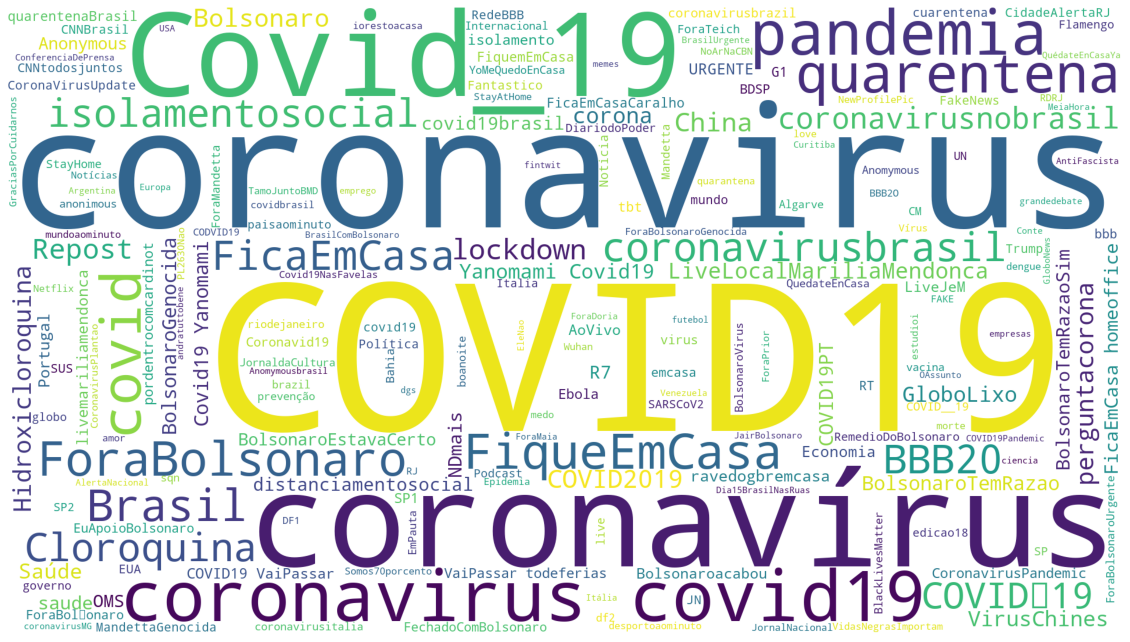

In [18]:
# concatenando as palavras
all_hashtags = " ".join(s for s in hashtags)

# criando a nuvem de palavras
wordcloud = WordCloud(background_color="white", width=1920, height=1080).generate(all_hashtags)

# mostrando a imagem final
fig, ax = plt.subplots(figsize=(20,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

Observe que há várias ocorrências de tags repetidas, como *COVID19*. Será necessário fazer mais um tratamento nos dados das hashtags para agrupar essas ocorrências repetidas.

Após o tratamento, vamos escrever aqui os resultados. Mas já podemos observar que as hashtags mais postadas foram *#COVID19*, *#coronavirus*, *#FiqueEmCasa*, *#pandemia* e *#quarentena*.

# Gerando *dataset* DuvidasDB com perguntas extraídas do *dataset* original

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
data = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/CINQUENTA-MIL.csv', error_bad_lines=False, delimiter=';', encoding="utf-8")

In [21]:
import re

def get_questions(txt):
  "gets  all the questions that are in the txt"
  return re.findall('[A-Za-z].*\?', txt)

In [22]:
# get tweet series
tweets = data.texto
tweets.head(5)

0    @BolsonaroSP Cade o fundão deputado??? Congres...
1    Em ação preventiva, o Governo do Estado suspen...
2    Incrível como os defensores do fim do distanci...
3    Fumaça de cigarro pode propagar coronavírus? h...
4    🚨Todos juntos contra COVID-19💪\n\nSolicite seu...
Name: texto, dtype: object

In [23]:
# apply 'get_questions' in all tweets
questions_arrays = tweets.apply(get_questions)
print(questions_arrays)

0                  [BolsonaroSP Cade o fundão deputado???]
1                                                       []
2                                                       []
3           [Fumaça de cigarro pode propagar coronavírus?]
4                                                       []
                               ...                        
49995                                                   []
49996                                                   []
49997                                                   []
49998                                                   []
49999    [wilsonwitzel Vc construindo ? Ou e verba fede...
Name: texto, Length: 50000, dtype: object


A fazer: aplicar a função de extrair perguntas sobre o conteúdo completo do tweet. Para isso, será necessário baixar o texto usando a URL do tweet. Para isso, vamos obter as short URLs dos tweets que as têm.

In [24]:
# obtain full content for tweet series
def has_URL(tweet):
  "Scan through string looking for a tweet URL, returning True if it has or False otherwise."
  return re.search('https.*$', tweet) != None  

def get_URL(tweet):
  return re.findall('https.*$', tweet)

has = tweets[tweets.apply(has_URL)]
urls = has.apply(get_URL)
display(urls)

1        [https://t.co/EPFXOMtwSY]
2        [https://t.co/oEyXDF9cDy]
3        [https://t.co/JT1oMiUCXf]
4        [https://t.co/p6wcoomynZ]
5        [https://t.co/dj4w3M7e5R]
                   ...            
49993    [https://t.co/eItQ12wwnE]
49994    [https://t.co/O9yL03wjyF]
49995    [https://t.co/8UQ45QppSx]
49996    [https://t.co/yb8nV66fY2]
49998    [https://t.co/YghBK4x8xw]
Name: texto, Length: 33117, dtype: object

Abaixo, vamos elaborar uma estratégia para obter o texto completo do tweet usando sua short URL.

In [25]:
import tweepy

consumer_key = "vXpGl6obnpLwkP6OBqxIgvBX3"
consumer_secret = "rIOwNZ80HMqz9fkpKQ8XompdoCC0f11YmdI3jXTH2dyUM30rIM"

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth)

# Por enquanto, vou obter o texto completo usando o ID do tweet. 
# Posteriormente, desejo obter o texto completo a partir da short URL.
def get_full_text_using_id(tweet_id):
  status = api.get_status(tweet_id, tweet_mode = "extended")
  return status.full_text

tweet_id = 1240115265423147017
print(get_full_text_using_id(tweet_id))

Em ação preventiva, o Governo do Estado suspendeu as aulas da rede estadual até 31 de março. ⁣
⁣
Esta ação está alinhada às estratégias de combate à proliferação do novo Coronavírus (Covid-19) no Pará. ❌🦠⁣
⁣Somente a distribuição da merenda escolar será mantida🥤🍎⁣
⁣📚⁣ https://t.co/iUsQEbEi5C


#**Processando as palavras das frases**

In [26]:
interrogacao ='?'
data['interrogativa'] = np.where(data['texto'].str.find(interrogacao)!= -1, True, False)
data.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,interrogativa
0,23/03/2020 18:51,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],True
1,18/03/2020 03:18,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[],False
2,29/03/2020 12:09,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[],False
3,01/04/2020 21:11,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],True
4,19/03/2020 17:49,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-478778.0,-1577691.0,[],False


In [27]:
data['interrogativa'].value_counts()

False    44835
True      5165
Name: interrogativa, dtype: int64

In [28]:
df1 = data[data['interrogativa'] != False]
df1.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,interrogativa
0,23/03/2020 18:51,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],True
3,01/04/2020 21:11,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],True
38,25/06/2020 11:09,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o ris...,0,86,pt,NaN,NaN,NaN,NaN,NaN,[],True
45,06/04/2020 15:44,Diorgenes Pandini,diorpandini,Prioridade ?!\n\n #COVID19 #floripa #isolament...,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']",True
57,30/03/2020 00:43,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do ...",0,201,pt,NaN,NaN,NaN,NaN,NaN,[],True


In [29]:
textosPuros = df1['texto']
print(textosPuros)

0        @BolsonaroSP Cade o fundão deputado??? Congres...
3        Fumaça de cigarro pode propagar coronavírus? h...
38       @ipratesMD @dr_pampers Será que corremos o ris...
45       Prioridade ?!\n\n #COVID19 #floripa #isolament...
57       Que tal uma notícia boa, indo na contramão do ...
                               ...                        
49949    quarentena chata né ?\n\nSolta o ponto q eu fa...
49953    E teus pais que viraram usuários de tiktok dur...
49962    @secomvc CADÊ A HIDROXIDOCLOQUINA E A AZITROMI...
49986    @rodaviva Baseado em qual fundamento, a Cloroq...
49999    @wilsonwitzel Vc construindo ? Ou e verba fede...
Name: texto, Length: 5165, dtype: object


In [30]:
frases = textosPuros.str.lower()
print(frases)

0        @bolsonarosp cade o fundão deputado??? congres...
3        fumaça de cigarro pode propagar coronavírus? h...
38       @ipratesmd @dr_pampers será que corremos o ris...
45       prioridade ?!\n\n #covid19 #floripa #isolament...
57       que tal uma notícia boa, indo na contramão do ...
                               ...                        
49949    quarentena chata né ?\n\nsolta o ponto q eu fa...
49953    e teus pais que viraram usuários de tiktok dur...
49962    @secomvc cadê a hidroxidocloquina e a azitromi...
49986    @rodaviva baseado em qual fundamento, a cloroq...
49999    @wilsonwitzel vc construindo ? ou e verba fede...
Name: texto, Length: 5165, dtype: object


In [35]:
textosQuebrados = [nltk.tokenize.word_tokenize(frase) for frase in frases] # Quebra por palavras(pontuações)
print(textosQuebrados)

[['@', 'bolsonarosp', 'cade', 'o', 'fundão', 'deputado', '?', '?', '?', 'congresso', 'está', 'sentado', 'em', '3bi', 'olhando', 'a', 'pandemia', 'da', 'janela', '.'], ['fumaça', 'de', 'cigarro', 'pode', 'propagar', 'coronavírus', '?', 'https', ':', '//t.co/jt1omiucxf'], ['@', 'ipratesmd', '@', 'dr_pampers', 'será', 'que', 'corremos', 'o', 'risco', 'de', 'termos', 'piolhos', 'super', 'resistentes', '?', 'o', 'uso', 'de', 'ivermectina', 'já', 'está…', 'https', ':', '//t.co/gnusgwgqw1'], ['prioridade', '?', '!', '#', 'covid19', '#', 'floripa', '#', 'isolamento', 'https', ':', '//t.co/ikjchaimzn'], ['que', 'tal', 'uma', 'notícia', 'boa', ',', 'indo', 'na', 'contramão', 'do', 'que', 'a', 'mídia', 'corrupta', 'está', 'fazendo', '(', 'tocando', 'o', 'terror', 'na', 'população', ')', '?', 'sã…', 'https', ':', '//t.co/kpfutx089e'], ['@', 'josemedeirosmt', 'seria', 'isso', 'algum', 'tipo', 'aleatório', 'de', 'demência', 'provocando', 'pelo', 'coronavírus', '?'], ['``', 'nova', 'york', 'é', 'o', 

In [37]:
stemmer = nltk.stem.RSLPStemmer()
stopwords = nltk.corpus.stopwords.words('portuguese')

dicionario = set()

for lista in textosQuebrados:
    validas = [stemmer.stem(palavra) for palavra in lista if len(palavra) > 2 and palavra not in stopwords and palavra.find("//") == -1]
    dicionario.update(validas)

totalDePalavras = len(dicionario)

print("Quantidade toda de palavras distintas:", totalDePalavras)
print(dicionario)

Quantidade toda de palavras distintas: 9875
{'diminuí', 'regul', 'coronavirusplanta', 'saudadedomar…', 'igrejamultiplicadora🙋…', 'pub', 'h1n1', 'igrej', 'alvarodias_', 'cana…', 'judic', 'mud', 'dooracul', 'embas', 'realiz', 'cunhaluc', 'expl…', 'leonardogarciaw', 'pap', 'moisés', 'hatepiii', 'negativ', 'chop', 'sözünün', 'amídal', 'maintenu', 'renator34297893', 'już', 'vez', 'enrol', 'aliança…', 'winstonling', 'plantao190', 'roquestumm', 'rastrei', 'filgmartin', 'pepp', 'eficac', 'espaço…', 'mamaemo', 'lewandowsk', 'craqu', 'homeopá', 'hank', 'otári', 'fundament', 'nióbi', 'exage…', 'var', 'algarv', 'governosp', 'energ', 'alexisfonteyn', 'difosfat', 'cormob', 'gabrielthedim7', 'safad…', 'remediodobolsonar', 'crack', 'cntg', 'gil…', 'ama', 'hornythickitten', 'conservadorj', 'tiagool53186569', 'vemmeteor', 'robô', 'rcp', 'ainda…', 'quant', 'reivindic', 'dud', 'aaa', 'mafenery', 'oglobopoli', '-voc', 'jument', 'bauru', 'etióp', 'historianopaint', '.ok', 'wizard', 'poup', 'sitom', 'daqu', 

In [38]:
tuplas = zip(dicionario, range(totalDePalavras))#Gera a relação PALAVRA & INDICE

tradutor = {palavra: indice for palavra, indice in tuplas}
print("TRADUTOR!", tradutor)

TRADUTOR! {'diminuí': 0, 'regul': 1, 'coronavirusplanta': 2, 'saudadedomar…': 3, 'igrejamultiplicadora🙋…': 4, 'pub': 5, 'h1n1': 6, 'igrej': 7, 'alvarodias_': 8, 'cana…': 9, 'judic': 10, 'mud': 11, 'dooracul': 12, 'embas': 13, 'realiz': 14, 'cunhaluc': 15, 'expl…': 16, 'leonardogarciaw': 17, 'pap': 18, 'moisés': 19, 'hatepiii': 20, 'negativ': 21, 'chop': 22, 'sözünün': 23, 'amídal': 24, 'maintenu': 25, 'renator34297893': 26, 'już': 27, 'vez': 28, 'enrol': 29, 'aliança…': 30, 'winstonling': 31, 'plantao190': 32, 'roquestumm': 33, 'rastrei': 34, 'filgmartin': 35, 'pepp': 36, 'eficac': 37, 'espaço…': 38, 'mamaemo': 39, 'lewandowsk': 40, 'craqu': 41, 'homeopá': 42, 'hank': 43, 'otári': 44, 'fundament': 45, 'nióbi': 46, 'exage…': 47, 'var': 48, 'algarv': 49, 'governosp': 50, 'energ': 51, 'alexisfonteyn': 52, 'difosfat': 53, 'cormob': 54, 'gabrielthedim7': 55, 'safad…': 56, 'remediodobolsonar': 57, 'crack': 58, 'cntg': 59, 'gil…': 60, 'ama': 61, 'hornythickitten': 62, 'conservadorj': 63, 'tia

In [39]:
sequencia_palavras = []
for e in tradutor:
    sequencia_palavras.append(e)

In [40]:
def vetorizar_texto(texto, tradutor, stemmer): # Representando cd.. a frase em um array
    vetor = [0] * len(tradutor) # vetor com N POSIÇÕES ## Constroi o vetor para cada FRASE, traduz uma palavra para uma posição do vetor
    for palavra in texto:
        if len(palavra) > 0:# Comparando a palavra com a sua raíz
            raiz = stemmer.stem(palavra)
            if raiz in tradutor:
                posicao = tradutor[raiz]
                vetor[posicao] += 1
    return vetor
vetoresDeTexto = [vetorizar_texto(texto, tradutor, stemmer) for texto in textosQuebrados] # Função para vetorizar os textos, passa por todas as frases
resultado = [sum(x) for x in zip(*vetoresDeTexto)]
print(resultado)

[1, 4, 1, 1, 1, 1, 16, 6, 6, 1, 1, 31, 1, 1, 5, 1, 1, 1, 19, 1, 1, 1, 2, 1, 1, 1, 1, 1, 42, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3, 5, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 97, 1, 3, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 13, 14, 1, 2, 10, 3, 1, 1, 10, 1, 1, 1, 1, 4, 10, 1, 1, 1, 1, 1, 1, 2, 1, 6, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 4, 1, 1, 18, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 5, 3, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 2, 2, 1, 3, 1, 9, 3, 7, 1, 3, 1, 2, 1, 4, 3, 2, 5, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 122, 8, 1, 2, 8, 4, 47, 1, 1, 1, 1, 14, 1, 35, 1, 1, 1, 1, 2, 4, 1, 1, 6, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 4, 2, 1, 8, 7, 1, 5, 36, 8, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 2, 6, 1, 27, 8, 1, 1, 1, 1, 1, 1, 29, 1, 1, 2, 1, 1, 7, 1, 1, 2, 1, 1, 1, 12, 1, 5, 2, 2, 19, 1, 4, 1, 1, 7, 1, 1, 1, 28, 2, 2, 1, 1, 1, 1, 1, 26, 1, 1, 8, 1, 2, 7, 1, 1, 1, 3, 4, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 4, 1

In [41]:
data = {
    'palavra' : sequencia_palavras,
    'repeticao' : resultado
}

palavra_repeticao = pd.DataFrame(data,columns=['palavra','repeticao'])

print("DATA FRAME: \n", palavra_repeticao)

DATA FRAME: 
                      palavra  repeticao
0                    diminuí          1
1                      regul          4
2          coronavirusplanta          1
3              saudadedomar…          1
4     igrejamultiplicadora🙋…          1
...                      ...        ...
9870                  well..          1
9871              wildicojen          1
9872                 petróle          1
9873                   tóxic          2
9874                  spread          3

[9875 rows x 2 columns]


In [42]:
palavra_repeticao.sort_values(['repeticao'], ascending=False).head(50)

,palavra,repeticao
6072,http,2666
2886,que,2337
3878,de,2129
7624,com,1317
2371,do,1194
5480,est,844
5757,em,834
844,pandem,617
1137,quarenten,598
9219,qu,589


In [43]:
print("Quantidade TOTAL de radicais das palavras: ", len(palavra_repeticao))

Quantidade TOTAL de radicais das palavras:  9875


In [ ]:
df1.head()

#**LUGARES**

In [44]:
lugares = df1[df1['lugar'].notnull()]

lugares.head()

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,interrogativa
77,13/04/2020 19:16,Gus,arrombagus,"""Nova York é o novo epicentro da pandemia de c...",3,253,pt,Santos,Brazil,BR,NaN,NaN,[],True
205,19/05/2020 06:11,Sher Machado,transcurecer,É muita coisa acontecendo nos últimos dias e p...,14,21791,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[],True
657,01/06/2020 22:06,Diego M 🇪🇪,_Manhaguanha,Povo de São Lourenço já leram os comentários n...,0,892,pt,São Lourenço do Oeste,Brazil,BR,NaN,NaN,[],True
1199,28/06/2020 02:30,De cola,_niseoliveira,Certeza que vocês estão cumprindo com o isolam...,0,590,pt,Itu,Brazil,BR,NaN,NaN,[],True
1253,02/04/2020 20:40,.Nathi 🐨,nathalisicuro,"@aliinemj Aline!!!!!! Mas que caralho amiga, j...",0,964,pt,Joinville,Brazil,BR,NaN,NaN,[],True


In [46]:
cidades = pd.read_csv('/content/drive/Shared drives/TRABALHO_POS/CIDADES-ESTADOS.csv', error_bad_lines=False, delimiter=',', encoding="utf-8")
cidades.head(5)

,nome_cidade,longitude,latitude,UF,nome_estado
0,Acrelândia,-66.902117,-9.832002,AC,Acre
1,Assis Brasil,-69.565833,-10.939382,AC,Acre
2,Brasiléia,-68.750179,-10.995393,AC,Acre
3,Bujari,-67.952297,-9.833953,AC,Acre
4,Capixaba,-67.676759,-10.574902,AC,Acre


In [55]:
saidas = pd.merge(lugares, cidades, how='left', left_on='lugar', right_on='nome_cidade')
saidas

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude_x,longitude_x,hashtags,interrogativa,nome_cidade,longitude_y,latitude_y,UF,nome_estado
0,13/04/2020 19:16,Gus,arrombagus,"""Nova York é o novo epicentro da pandemia de c...",3,253,pt,Santos,Brazil,BR,NaN,NaN,[],True,Santos,-46.335440,-23.954024,SP,São Paulo
1,19/05/2020 06:11,Sher Machado,transcurecer,É muita coisa acontecendo nos últimos dias e p...,14,21791,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[],True,Rio de Janeiro,-43.201041,-22.913868,RJ,Rio de Janeiro
2,01/06/2020 22:06,Diego M 🇪🇪,_Manhaguanha,Povo de São Lourenço já leram os comentários n...,0,892,pt,São Lourenço do Oeste,Brazil,BR,NaN,NaN,[],True,São Lourenço do Oeste,-52.850286,-26.356128,SC,Santa Catarina
3,28/06/2020 02:30,De cola,_niseoliveira,Certeza que vocês estão cumprindo com o isolam...,0,590,pt,Itu,Brazil,BR,NaN,NaN,[],True,Itu,-47.293091,-23.254874,SP,São Paulo
4,02/04/2020 20:40,.Nathi 🐨,nathalisicuro,"@aliinemj Aline!!!!!! Mas que caralho amiga, j...",0,964,pt,Joinville,Brazil,BR,NaN,NaN,[],True,Joinville,-48.849098,-26.304978,SC,Santa Catarina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,06/04/2020 16:45,Erivelto Eder Dias🎷,Eriveltodias,@haranaha @bernardopkuster Onde está tendo loc...,0,34,pt,Curitiba,Brazil,BR,NaN,NaN,[],True,Curitiba,-49.265468,-25.420501,PR,Paraná
262,05/04/2020 20:12,bi.,biipolarr_,“Você não tá com medo do coronavírus?” Sou enf...,0,450,pt,Curitiba,Brazil,BR,NaN,NaN,[],True,Curitiba,-49.265468,-25.420501,PR,Paraná
263,23/01/2020 00:16,Felipe 🅱️,ofelipeb,Xi Jinping vai aproveitar a desculpa do corona...,0,1586,pt,Rio de Janeiro,Brazil,BR,NaN,NaN,[],True,Rio de Janeiro,-43.201041,-22.913868,RJ,Rio de Janeiro
264,12/03/2020 02:58,🇧🇷 électronique femmebot: the reboot,andrelukz,beijar? nesta pandemia?,0,421,pt,Itaperuna,Brazil,BR,NaN,NaN,[],True,Itaperuna,-41.880266,-21.200147,RJ,Rio de Janeiro


In [ ]:
import folium 
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[10,12,40,70,23,43,100,43]
})
data

In [ ]:
m = folium.Map(location=[-16.1237611, -59.9219642],
    zoom_start=4)
 
# I can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=data.iloc[i]['value']*10000.0,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m
# Save it as html
#m.save('mymap.html')